# HCI Week 6 - Polarimetric Differential Imaging
*Matthew Kenworthy - Leiden Observatory*

This week you will be looking at imaging data taken with a polariser.

**PLEASE DO NOT EMAIL BACK THE FITS IMAGES YOU MAKE, ONLY THE .ipynb NOTEBOOK!**

The data is of a star surrounded by a nearly face-on dust disk. You will carry out difference imaging to remove the unpolarised stellar flux and let the polarised flux shine through. The disk can barely be seen in the intensity image, but is clearly seen in the degree of linear polarization image. 

The polarization state of photons encodes information about the scattering of the photon from dust in circumstellar disks, and from aerosols in planetary atmospheres.

The polarization data is from NaCo, an imaging camera that sits at the Nasmyth focus of the Very Large Telescope (VLT), and the data is taken at a wavelength of 2.15 microns (K band). The data has been kindly provided by Jos de Boer at Leiden Observatory.

NaCo takes two images of an astronomical object through a Wollaston prism, which splits incoming light into two orthogonal polarized images which we will refer to as Left (L) and Right (R).

A Half-Wave Plate is rotated so that **4** different polarization angles are imaged in the sequence 0, 45, 90 and 135 degrees, and two polarized images are taken each time.

The large number of images are taken so that time-varying and detector-varying effects can be removed. You will look at single differencing and double differencing.

In effect, we are determining 3 numbers for each pixel on the detector - $I, Q, U$ and we have more data than unknown parameters.

<img src="polarization_setup.png">

The images themselves measure these quantities:

$S_0(L) = I + Q + Q_{IP}$

$S_1(L) = I + U + U_{IP}$

$S_2(L) = I - Q + Q_{IP}$

$S_3(L) = I - U + U_{IP}$

and

$S_0(R) = I - Q - Q_{IP}$

$S_1(R) = I - U - U_{IP}$

$S_2(R) = I + Q - Q_{IP}$

$S_3(R) = I + U - U_{IP}$

...where $Q_{IP}$ and $U_{IP}$ are the instrumental polarizations - initially, you can assume that these are zero, but when considering double differencing later on, they are nonzero.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
%matplotlib inline

def circle_mask(im, xc, yc, rcirc):
        ny, nx = im.shape
        y,x = np.mgrid[0:nx,0:ny]
        r = np.sqrt((x-xc)*(x-xc) + (y-yc)*(y-yc))
        return ( (r < rcirc))       

Read in the data cube from `ORD_EXT_4HWP.fits` into a numpy array and call it `im`.

**Q1 (2 points):** Using the `shape` method, print out which dimensions (they start from dimension `0`) in the image contain the `L` and `R` images, the different position angles, and the size and shape of the input images.

In [2]:
# Q1 answer here

# read in the two data cubes
Data, Head = fits.getdata('ORD_EXT_4HWP.fits', header=True)
print('The whole data cube-size:',Data.shape)
# (4, 2, 100, 100)
# The '.fits' data contains 4 images (0, 45, 90, 135) each one with two measurements (L and R), 
# and the size of each image is 100x100 pixels.

print('Angle 0 size:\t\t', Data[0].shape) #Each one has two measurement corresponding to L and R. Also 100x100 pix.
print('Angle 45 size:\t\t', Data[1].shape)
print('Angle 90 size:\t\t', Data[2].shape)
print('Angle 135 size:\t\t', Data[3].shape)

The whole data cube-size: (4, 2, 100, 100)
Angle 0 size:		 (2, 100, 100)
Angle 45 size:		 (2, 100, 100)
Angle 90 size:		 (2, 100, 100)
Angle 135 size:		 (2, 100, 100)


## The intensity and difference images

First, we look at the intensity image. Adding the `L` and `R` images together, and averaging over the 4 orientations of the polariser will produce the intensity image `Itot`.

**Q2 (2 points):** Calculate `Itot` and display it with `imshow`

(4, 100, 100)


/usr/lib/python3.5/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in log10


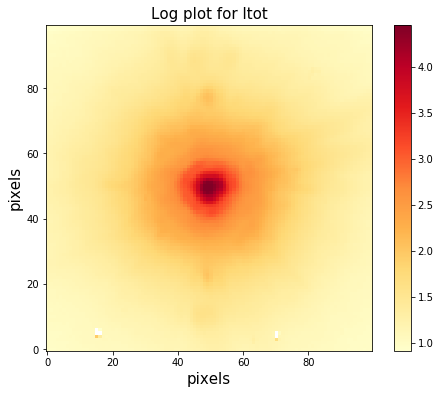

In [3]:
# Q2 answer here

Itot = []                                  #Array to save the total intensity
for i in range(4):
    Itot.append( Data[i][0] + Data[i][1] ) #Adding L and R intensities for each angle
Itot = np.array(Itot)                      #Total intensity is saved in a python array.

print(Itot.shape)                          #Sanity check for image dimension.

Itot = np.mean(Itot, 0)                    #computes the mean of the image along the axis 0

plt.figure(figsize = (8,6))                #Ploting the average Itot
plt.imshow(np.log10(Itot), origin = 'lower', cmap = 'YlOrRd')
plt.xlabel('pixels', size = 15)
plt.ylabel('pixels', size = 15)
plt.title('Log plot for Itot', size = 15)
plt.colorbar()

Each `L` and `R` image pair are orthogonal polarisations, so summing and differencing them will produce an intensity and a polarisation image respectively.

**Q3 (2 points):** Create `spos` and `sneg`, the sum and difference of the `L` and `R` images. Check that you have subtracted the correct dimensions by printing out the `shape` of both of these arrays. Think about what you expect the `shape` of the output arrays to be. Write both images out to FITS images (call them `SPOS.fits` and `SNEG.fits`) and check that the SNEG images have the butterfly pattern in them in `ds9`.

Use `imshow` with `vmin=-50` and `vmax=50` and display the 0 degree image in `sneg`.

SPOS shape: (4, 100, 100)
SNEG shape: (4, 100, 100)


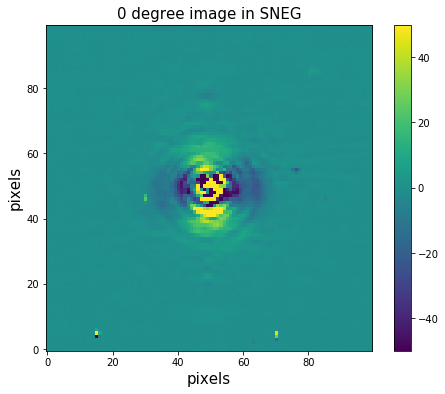

In [4]:
# Q3 answer here
spos = []                                  #Array with L+R
sneg = []                                  #Array with L-R

for i in range(4):
    spos.append( Data[i][0] + Data[i][1] ) #Filling up the arrays
    sneg.append( Data[i][0] - Data[i][1] )
    
spos = np.array(spos)                      #Python numpy array form
sneg = np.array(sneg)

print('SPOS shape:', spos.shape)                          #Sanity check for the arrays' shape
print('SNEG shape:', sneg.shape)

filename = 'SPOS.fits'                     #Saving the spos image to a fits file
hdu      = fits.PrimaryHDU(spos)
hdu.writeto(filename, overwrite=True)

filename_2 = 'SNEG.fits'                   #Saving the sneg image to a fits file
hdu_2      = fits.PrimaryHDU(sneg)
hdu_2.writeto(filename_2, overwrite=True)

plt.figure(figsize = (8,6))                #Displaying the 0 degree image in sneg
plt.imshow(sneg[0], vmin = -50, vmax = 50, origin = 'lower')
plt.xlabel('pixels', size = 15)
plt.ylabel('pixels', size = 15)
plt.title('0 degree image in SNEG', size = 15)
plt.colorbar()

## Making a polarization image

We can now look at the disk for the first time by calculating the Polarised Intensity, which is $\surd(Q^2 + U^2)$. 

**Q4 (2 points):** In image `sneg`, defining dimension 0 as the Q and dimension 1 as the U, calculated the polarised intensity as `Ipol`. Display it in the range -50 to +50.

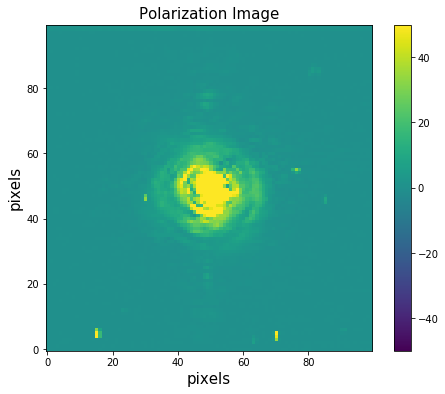

In [5]:
# Q4 answer here
Q    = sneg[0]                                  #Setting sneg 0 degree image as Q
U    = sneg[1]                                  #Setting sneg 45 degree image as U
Ipol = np.sqrt( np.square(Q) + np.square(U) )   #computing the polarised intesity

plt.figure(figsize = (8,6))
plt.imshow(Ipol, vmin = -50, vmax = 50, origin = 'lower')
plt.xlabel('pixels', size = 15)
plt.ylabel('pixels', size = 15)
plt.title('Polarization Image', size = 15)
plt.colorbar()

## Plotting up the gain in contrast

**Q5 (2 points):** Plot out row 50 in `Itot` and overplot the same row in `Ipol` on the same graph. Make the y-axis have a logarithmic scale by using `ax=plt.gca()` to get the name of the current plotting window, and `ax.set_yscale('log')` to make it logarithmic. **REMEMBER** label the axes as "Spatial cut across image [pix]" and a suitable title and units for the y-axis.


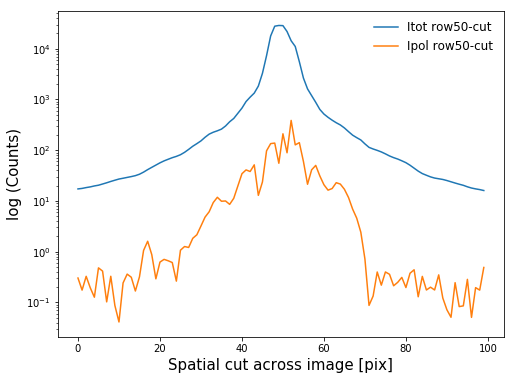

In [6]:
# Q5 answer here

plt.figure(figsize = (8,6))
plt.plot(Itot[49,:], label = 'Itot row50-cut')  #row 50 in Itot
plt.plot(Ipol[49,:], label = 'Ipol row50-cut')  #row
plt.xlabel('Spatial cut across image [pix]', size = 15)
plt.ylabel('log (Counts)', size = 15)
plt.legend(frameon = False, prop = {'size': 12})
ax = plt.gca()
ax.set_yscale('log')

**Q6 (1 point):** Plot the ratio of the two lines above, to get an idea of the fractional polarization that is measured. Write down to the nearest one percent what the polarization level is.

The polarization level is: 2%


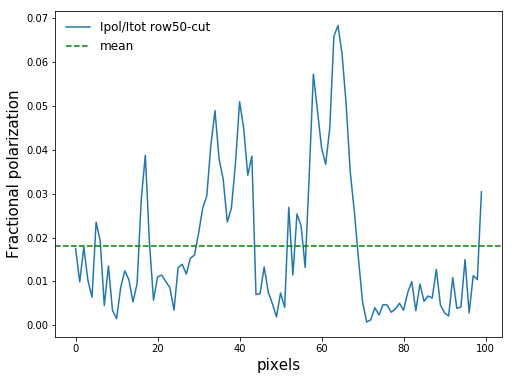

In [7]:
# Q6 answer here
Ratio = Ipol[49,:]/Itot[49,:]

plt.figure(figsize = (8,6))
plt.plot(Ratio, label = 'Ipol/Itot row50-cut')
plt.axhline(y = np.mean(Ratio), color = 'g', linestyle = '--', label = 'mean')
plt.xlabel('pixels', size = 15)
plt.ylabel('Fractional polarization', size = 15)
plt.legend(frameon = False, prop = {'size': 12})

print('The polarization level is: %1.f%%'%(100*np.mean(Ratio))) #Nearest one percentof the polarization level

## Double difference

You have more images than there are parameters to measure, so why do we have this extra data?
We are measuring polarization by comparing intensities of the images, but there's no guarantee that the transmission of optics forming the `L` and `R` images are the same, and since we have to take a series of images in time, the instrument and the atmospheric conditions may have changed as well.

**Q7 (1 point):** Using the definitions of $S(L)$ and $S(R)$ from the top of the practicum, write out what `spos` and `sneg` are in terms of `Q` and `U`.

You see that you have four independent measurements of `I` and two independent measurements of `Q` and `U` in `sneg`.

We can average the values in `spos` together to get `I` - combine the $S_0$ and $S_2$ components in `spos` to get `I`.

We can average the values in `sneg` together to get `U` and `Q`.

** Q8 (3 points):** With `sneg`, combine the $S_0$ and $S_2$ values to get a `Q` value, and combine the $S_1$ and $S_3$ values to get a `U` value.

Calculate the polarisation `P` using the formula above.

** Q9 (1 point):** Calculate the angle of polarization `TH` using the formula:

$TH = 0.5\arctan(U/Q)$

...using the `np.arctan2()` function.


In [8]:
# Q7, Q8, Q9 answers here

'''
spos[0] = SL0 + SR0 = I + Q + Q_{IP}   +   I - Q - Q_{IP} = 2I
spos[1] = SL1 + SR1 = I + U + U_{IP}   +   I - U - U_{IP} = 2I
spos[2] = SL2 + SR2 = I - Q + Q_{IP}   +   I + Q - Q_{IP} = 2I
spos[3] = SL3 + SR3 = I - U + U_{IP}   +   I + U - U_{IP} = 2I

We have 4 independent measurements of I.

sneg[0] = SL0 - SR0 = I + Q + Q_{IP}   -   (I - Q - Q_{IP}) = 2Q + 2Q_{IP}
sneg[1] = SL1 - SR1 = I + U + U_{IP}   -   (I - U - U_{IP}) = 2U + 2U_{IP}
sneg[2] = SL2 - SR2 = I - Q + Q_{IP}   -   (I + Q - Q_{IP}) = -2Q + 2Q_{IP}
sneg[3] = SL3 - SR3 = I - U + U_{IP}   -   (I + U - U_{IP}) = -2U + 2U_{IP}

We have 2 independent measurements of both Q and U.
'''

I = (spos[0] + spos[2]) / 4.                   #Computing I,Q and U with the above relations
Q = (sneg[0] - sneg[2]) / 4.
U = (sneg[1] - sneg[3]) / 4.

P = np.sqrt( np.square(Q) + np.square(U) )     #Computing poalrization

#print('The polarization is: %.2f'%np.mean(P))

TH = 0.5 * np.arctan2(U, Q)                    #Computing the angle of polarization 

## Polarization image

**Q10 (1 point)** Mask out a circle of radius 5 pixels in the middle of the polarization image, and display it with the range (0,80). You should see spiral arms in the polarization image.

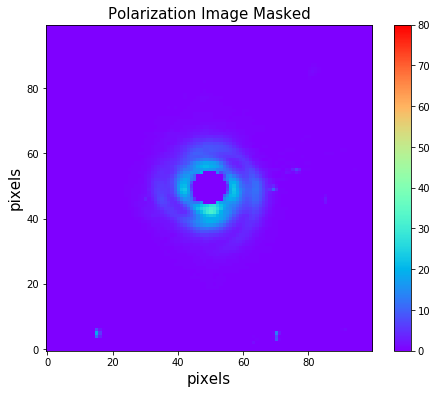

In [9]:
# Q10 answer here
X = (100.0 - 1.0)/2.0                              #Center of the mask
Y = (100.0 - 1.0)/2.0
Mask = circle_mask(P, xc = X, yc = Y, rcirc = 5)   #Circle of radius 5 pixels

plt.figure(figsize = (8,6))                        #Masking the center
plt.imshow(P *~ Mask, vmin = 0, vmax = 80, origin = 'lower', cmap = 'rainbow')
plt.xlabel('pixels', size = 15)
plt.ylabel('pixels', size = 15)
plt.title('Polarization Image Masked', size = 15)
plt.colorbar()

## Fractional polarization

** Q11 (1 point): ** Display the fractional polarization (P/I) image from 0 to 0.10 (10% polarization).

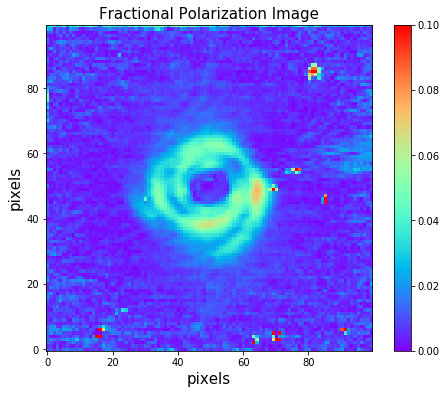

In [10]:
# Q11 answer here
plt.figure(figsize = (8,6))                   #Plotting the fractional polarization
plt.imshow(P/I, vmin = 0, vmax = 0.1, origin = 'lower', cmap = 'rainbow')
plt.xlabel('pixels', size = 15)
plt.ylabel('pixels', size = 15)
plt.title('Fractional Polarization Image', size = 15)
plt.colorbar()

## Limits of signal to noise by looking at the polarization angle.

The scattered light should be at right angles to the line between any spot on the disk and the central star. Plotting the polarization angle and seeing where it degenerates into noise gives a good indication where the polarization signal lies.

** Q12 (1 point): ** Display the polarization angle map.


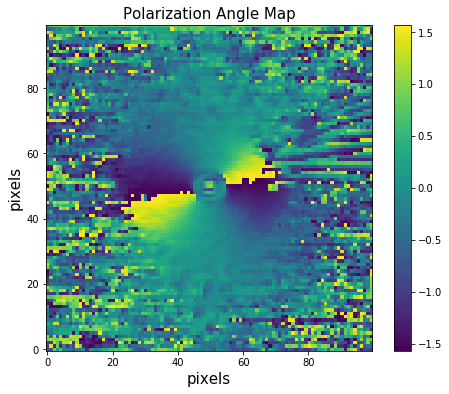

In [11]:
# Q12 answer here
plt.figure(figsize = (8,6))      #Plotting the polarization angle
plt.imshow(TH, origin = 'lower')
plt.xlabel('pixels', size = 15)
plt.ylabel('pixels', size = 15)
plt.title('Polarization Angle Map', size = 15)
plt.colorbar()


** Q13 (2 points): ** Make a circular annular mask centered on the star that blocks out the star and the noisy polarization angles at large radii (estimate by eye what outer radius to use). 

Use this mask to display the spiral arms in the disk in the fractional polarization image.

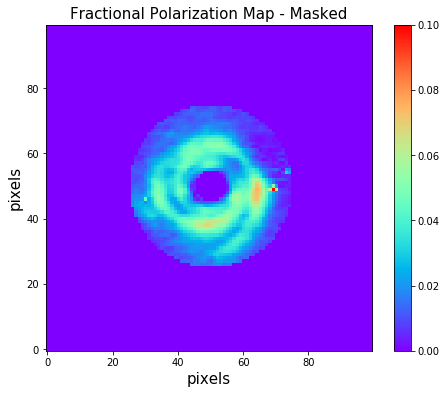

In [12]:
# Q13 answer here
Mask_1 = circle_mask(P, xc = 50, yc = 50, rcirc = 5)    #Central star mask
Mask_2 = circle_mask(P, xc = 50, yc = 50, rcirc = 25)   #Mask for noisy polarization angles
Mask_2 = [*~Mask_2]                                     #Making the mask to work outside the radius

plt.figure(figsize = (8,6))
plt.imshow((P/I)*~np.logical_or(Mask_1, Mask_2), vmin=0, vmax=0.1, origin = 'lower', cmap = 'rainbow')
plt.xlabel('pixels', size = 15)
plt.ylabel('pixels', size = 15)
plt.title('Fractional Polarization Map - Masked', size = 15)
plt.colorbar()

**PLEASE DO NOT EMAIL BACK THE FITS IMAGES YOU MAKE, ONLY THE .ipynb NOTEBOOK!**